In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
full_dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col=0, parse_dates=True)
full_dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,,
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# Table Of Content

In [3]:
# 1. Data Prep
# 2. Data Analysis

# 1. Data Preparation

In [4]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)
full_dataframe.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 1 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract      

# Cleaning of Data.

In [5]:
full_dataframe.isnull().sum() # check if null

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:

# remove CID and blanks from total charges
full_dataframe=pd.DataFrame(full_dataframe.drop('customerID', axis = 1))
full_dataframe = full_dataframe[full_dataframe['TotalCharges'] != " "]
full_dataframe.dropna()
full_dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# changing yes no into 1/0
full_dataframe["MultipleLines"].replace("No phone service","No",inplace=True)
full_dataframe["OnlineSecurity"].replace("No internet service","No",inplace=True)
full_dataframe["OnlineBackup"].replace("No internet service","No",inplace=True)
full_dataframe["DeviceProtection"].replace("No internet service","No",inplace=True)
full_dataframe["TechSupport"].replace("No internet service","No",inplace=True)
full_dataframe["StreamingTV"].replace("No internet service","No",inplace=True)
full_dataframe["StreamingMovies"].replace("No internet service","No",inplace=True)

In [9]:
full_dataframe.loc[full_dataframe["OnlineSecurity"] == "No internet service"] # check to see if it's cleaned.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
pd.get_dummies(full_dataframe, columns=["Partner"]).head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes
#,,,,,,,,,,,,,,,,,,,,,
1,Female,0,No,1,No,No,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1
2,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0
3,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0
4,Male,0,No,45,No,No,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0
5,Female,0,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0


In [12]:
pd.get_dummies(full_dataframe, columns=["Contract"]).head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
#,,,,,,,,,,,,,,,,,,,,,
1,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,Yes,Electronic check,29.85,29.85,No,1,0,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,Mailed check,56.95,1889.5,No,0,1,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Yes,Mailed check,53.85,108.15,Yes,1,0,0
4,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,No,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Yes,Electronic check,70.70,151.65,Yes,1,0,0


In [13]:
pd.get_dummies(full_dataframe, columns=["PaymentMethod"]).head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
#,,,,,,,,,,,,,,,,,,,,,
1,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,Month-to-month,Yes,29.85,29.85,No,0,0,1,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,56.95,1889.5,No,0,0,0,1
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,53.85,108.15,Yes,0,0,0,1
4,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,One year,No,42.30,1840.75,No,1,0,0,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,70.70,151.65,Yes,0,0,1,0


In [14]:
from sklearn.preprocessing import LabelEncoder
colslabel =['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn']
full_dataframe[colslabel] = full_dataframe[colslabel].apply(LabelEncoder().fit_transform)
print(full_dataframe)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
1          0              0        1           0       1             0   
2          1              0        0           0      34             1   
3          1              0        0           0       2             1   
4          1              0        0           0      45             0   
5          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7039       1              0        1           1      24             1   
7040       0              0        1           1      72             1   
7041       0              0        1           1      11             0   
7042       1              1        1           0       4             1   
7043       1              0        0           0      66             1   

      MultipleLines  InternetService 

# Split of data

80:20

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_dataframe, test_size=0.2)

In [16]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
6104,1,0,0,0,16,1,0,2,0,0,0,0,0,0,0,0,1,19.75,294.9,0
1270,1,0,1,1,62,1,1,1,1,1,1,1,1,1,2,0,0,115.55,7159.05,0
2253,0,0,1,1,64,1,0,2,0,0,0,0,0,0,1,0,0,19.80,1336.65,0
4425,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,24.75,24.75,1
1502,1,0,0,0,13,1,0,2,0,0,0,0,0,0,2,0,3,19.95,243.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1,0,1,1,23,1,0,1,0,1,1,1,0,0,1,0,3,86.80,1940.8,0
5536,0,0,1,1,55,1,1,0,1,0,1,1,1,1,2,1,0,85.10,4657.95,0
5943,0,0,1,0,9,0,0,0,0,0,1,0,1,1,0,1,2,48.75,442.2,1


In [17]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
6033,1,1,1,0,68,1,1,1,0,1,1,0,1,1,0,1,2,105.30,7299.65,1
2259,1,0,0,0,56,1,0,0,1,0,1,0,0,0,1,0,3,52.70,3019.7,0
3142,1,1,0,0,2,1,0,1,0,1,1,1,0,1,0,1,1,95.10,180.25,1
5950,0,0,0,0,68,0,0,0,0,1,0,1,0,1,0,0,2,44.95,3085.35,0
3872,1,0,0,0,3,1,1,1,0,0,1,0,1,1,0,1,0,101.55,298.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,1,0,0,0,47,1,1,1,0,1,1,0,1,1,1,1,2,103.10,4889.3,0
5511,1,0,0,0,18,1,0,1,0,1,1,0,1,1,0,0,1,101.30,1794.65,0
3405,0,0,0,1,35,1,0,0,1,1,0,0,0,0,1,0,1,55.60,2016.45,0


In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = pd.DataFrame(train['Churn'])
X = pd.DataFrame(train.drop('Churn', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators = 300, 
                                 max_depth = 10)       
rforest.fit(X_train, y_train.Churn.ravel())

Train Data
Accuracy  :	 0.8994157988315976

TPR Train :	 0.7459562321598477
TNR Train :	 0.9553014553014553

FPR Train :	 0.0446985446985447
FNR Train :	 0.25404376784015226


<AxesSubplot:>

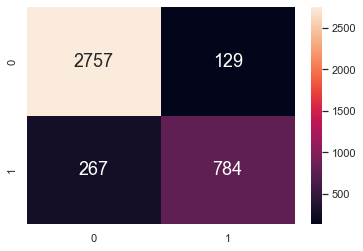

In [19]:
from sklearn.metrics import confusion_matrix
y_train_pred = rforest.predict(X_train)
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]
print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8033175355450237

TPR Test :	 0.501123595505618
TNR Test :	 0.911504424778761

FPR Test :	 0.08849557522123894
FNR Test :	 0.49887640449438203


<AxesSubplot:>

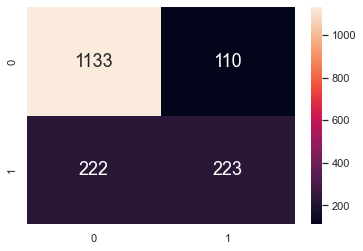

In [20]:

from sklearn.metrics import confusion_matrix
y_test_pred = rforest.predict(X_test)
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]
print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [21]:
##Hyper parameter testing
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Churn.ravel())

KeyboardInterrupt: 

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

In [ ]:
train.corr()

# KFold Cross Validation

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [24]:
tcharge = pd.DataFrame(train['TotalCharges'])   # Response
tchurn = pd.DataFrame(train['Churn'])       # Predictor

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tcharge, tchurn, test_size = 0.20)

#  Logistic Regression

In [26]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/nicholaswong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7191111111111111

# Support Vector Machine (SVM)

In [27]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

/Users/nicholaswong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7297777777777777

# Random Forest

In [28]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/var/folders/f1/b9jtl_x97kd8y5n9h1btlbj40000gn/T/ipykernel_7153/2692549809.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.6746666666666666

# KFold cross validation

In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [30]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [31]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
digits = load_digits()

folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [33]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [34]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [35]:
scores_rf

[0.9382303839732888, 0.9449081803005008, 0.9298831385642737]

# cross_val_score function

In [36]:
from sklearn.model_selection import cross_val_score


# Logistic regression model performance using cross_val_score



In [37]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)


array([0.89482471, 0.95325543, 0.90984975])

# svm model performance using cross_val_score

In [38]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)


array([0.38063439, 0.41068447, 0.51252087])

# random forest performance using cross_val_score

In [39]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)


array([0.92153589, 0.94657763, 0.91819699])

In [40]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8592085661080076

In [41]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9360086902545003

In [42]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9443544382371197

In [43]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9471322160148976

# We used cross_val_score to fine tune our random forest performance and 40 trees gives the best performance.

# Removing outliers

Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
full_dataframe['TotalCharges'] = pd.to_numeric(full_dataframe.TotalCharges, errors='coerce') # convert TotalCharges from object to Float.

In [ ]:
Data = pd.DataFrame(full_dataframe, columns=['TotalCharges'])
TotalCharges =  pd.DataFrame(full_dataframe['TotalCharges'])
Data.head()

In [ ]:
TotalCharges.decribe()

In [ ]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=TotalCharges,orient = "h")

In [ ]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)

In [ ]:
# Extract only the numeric data variables
numeric_q1_data = pd.DataFrame(full_dataframe[['TotalCharges']])

# Summary Statistics for all Variables
numeric_q1_data.describe().round(2)

In [ ]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
Data < (Q1 - 1.5 * IQR)
Data > (Q3 + 1.5 * IQR)

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print("Data type : ", type(Data_clean))
print("Data dims : ", Data_clean.shape)

MonthlyCharges

In [ ]:
Data = pd.DataFrame(full_dataframe, columns=['MonthlyCharges'])
MonthlyCharges =  pd.DataFrame(full_dataframe['MonthlyCharges'])
Data.head()

In [ ]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=MonthlyCharges,orient = "h")

In [ ]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)

In [ ]:
# Extract only the numeric data variables
numeric_q1_data = pd.DataFrame(full_dataframe[['MonthlyCharges']])

# Summary Statistics for all Variables
numeric_q1_data.describe().round(2)

In [ ]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
Data < (Q1 - 1.5 * IQR)
Data > (Q3 + 1.5 * IQR)

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print("Data type : ", type(Data_clean))
print("Data dims : ", Data_clean.shape)

Tenure

In [ ]:
Data = pd.DataFrame(full_dataframe, columns=['tenure'])
tenure =  pd.DataFrame(full_dataframe['tenure'])
Data.head()

In [ ]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=tenure,orient = "h")

In [ ]:
tenure = pd.DataFrame(train['tenure'])
mcharges = pd.DataFrame(train['MonthlyCharges'])
tcharges = pd.DataFrame(train['TotalCharges'])


In [ ]:
train

In [ ]:
f = plt.figure(figsize=(16,8))
sb.kdeplot(data = tenure)

f = plt.figure(figsize=(16,8))
sb.kdeplot(data = mcharges)

f = plt.figure(figsize=(16,8))
sb.kdeplot(data = tcharges)

tenure.skew()
mcharges.skew()
tcharges.skew()

In [ ]:
# Set up matplotlib figure with one subplots
f, axes = plt.subplots(3, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for jointDF
sb.boxplot(data = tenure, orient = "h", ax = axes[0,0])
sb.histplot(data = tenure, ax = axes[0,1])
sb.violinplot(data = tenure, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for jointDF
sb.boxplot(data = mcharges, orient = "h", ax = axes[1,0])
sb.histplot(data = mcharges, ax = axes[1,1])
sb.violinplot(data = mcharges, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for jointDF
sb.boxplot(data = tcharges, orient = "h", ax = axes[2,0])
sb.histplot(data = tcharges, ax = axes[2,1])
sb.violinplot(data = tcharges, orient = "h", ax = axes[2,2])


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [ ]:
import plotly.express as px

In [ ]:
# Histogram of Numeric across Categorical with Marginals
fig = px.histogram(train, x = "tenure", color = "Churn", marginal = "box")
fig.show()

In [ ]:
# Histogram of Numeric across Categorical with Marginals
fig = px.histogram(train, x = "MonthlyCharges", color = "Churn", marginal = "box")
fig.show()

In [ ]:
# Scatter Matrix for Numerics across Categorical
fig = px.scatter_matrix(train, 
                        dimensions=["tenure", "MonthlyCharges", "TotalCharges"], 
                        color = "Churn")
fig.show()

# 2. Exploratory Data Analysis

# Churn Rate

Number of Churn : 2
0    4129
1    1496
Name: Churn, dtype: int64


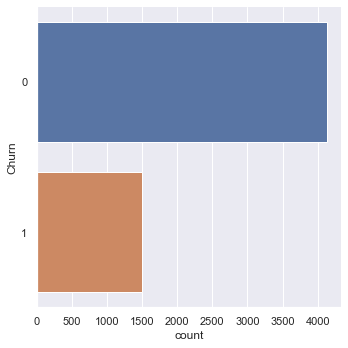

In [22]:
# Generations in the Dataset
print("Number of Churn :", len(train["Churn"].unique()))

# Pokemons in each Generation
print(train["Churn"].value_counts())
sb.catplot(y = "Churn", data = train, kind = "count")

In [23]:
(1501/4124)*100

36.39670223084384

# Insightful knowledge that for every 100 customers, about 36 people will churn - making it about 36.4% churn rate

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 6104 to 5295
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   int64  
 7   InternetService   5625 non-null   int64  
 8   OnlineSecurity    5625 non-null   int64  
 9   OnlineBackup      5625 non-null   int64  
 10  DeviceProtection  5625 non-null   int64  
 11  TechSupport       5625 non-null   int64  
 12  StreamingTV       5625 non-null   int64  
 13  StreamingMovies   5625 non-null   int64  
 14  Contract          5625 non-null   int64  
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   int64

In [25]:
# Extract only the numeric data variables
compare_numDF = pd.DataFrame(train[["Churn", "MonthlyCharges", "TotalCharges", "tenure"]])

# Summary Statistics for all Variables
compare_numDF.describe()

,Churn,MonthlyCharges,tenure
count,5625.000000,5625.000000,5625.000000
mean,0.265956,64.750240,32.291200
std,0.441880,30.046332,24.536496
min,0.000000,18.250000,1.000000
25%,0.000000,35.750000,9.000000
50%,0.000000,70.300000,28.000000
75%,1.000000,89.850000,55.000000
max,1.000000,118.650000,72.000000


In [26]:
# Calculate the complete  correlation matrix
compare_numDF.corr()

,Churn,MonthlyCharges,tenure
Churn,1.000000,0.190504,-0.354524
MonthlyCharges,0.190504,1.000000,0.236519
tenure,-0.354524,0.236519,1.000000


<AxesSubplot:>

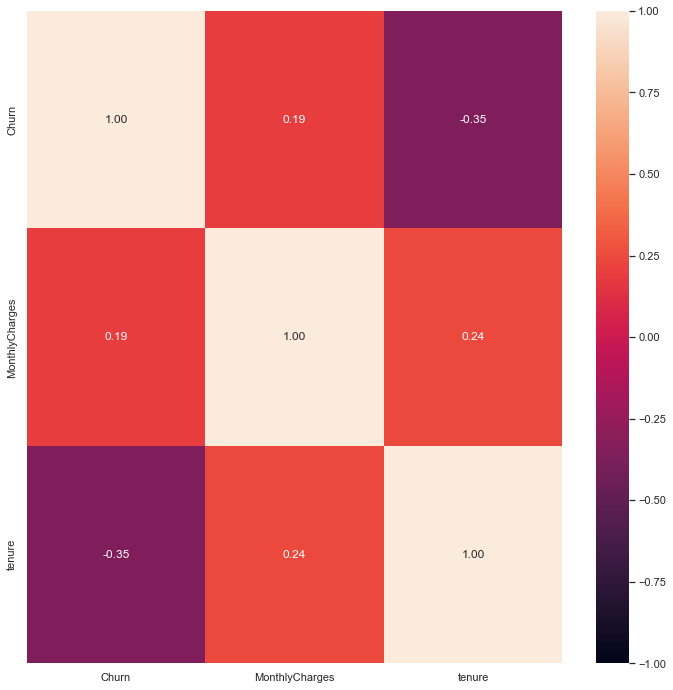

In [27]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(compare_numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

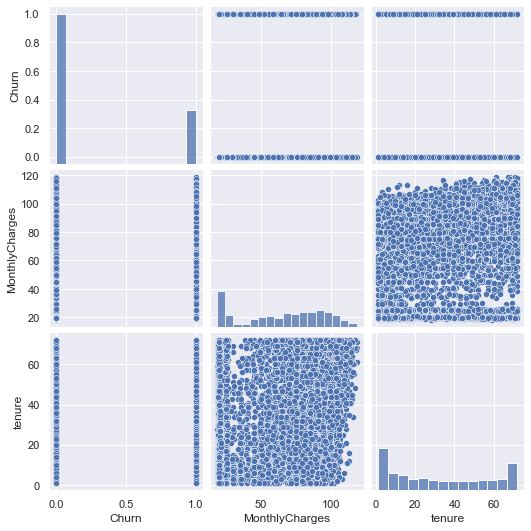

In [28]:
# Draw pairs of variables against one another
sb.pairplot(data = compare_numDF)

In [36]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
6104,1,0,0,0,16,1,0,2,0,0,0,0,0,0,0,0,1,19.75,294.9,0
1270,1,0,1,1,62,1,1,1,1,1,1,1,1,1,2,0,0,115.55,7159.05,0
2253,0,0,1,1,64,1,0,2,0,0,0,0,0,0,1,0,0,19.80,1336.65,0
4425,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,24.75,24.75,1
1502,1,0,0,0,13,1,0,2,0,0,0,0,0,0,2,0,3,19.95,243.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1,0,1,1,23,1,0,1,0,1,1,1,0,0,1,0,3,86.80,1940.8,0
5536,0,0,1,1,55,1,1,0,1,0,1,1,1,1,2,1,0,85.10,4657.95,0
5943,0,0,1,0,9,0,0,0,0,0,1,0,1,1,0,1,2,48.75,442.2,1


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 6104 to 5295
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   int64  
 7   InternetService   5625 non-null   int64  
 8   OnlineSecurity    5625 non-null   int64  
 9   OnlineBackup      5625 non-null   int64  
 10  DeviceProtection  5625 non-null   int64  
 11  TechSupport       5625 non-null   int64  
 12  StreamingTV       5625 non-null   int64  
 13  StreamingMovies   5625 non-null   int64  
 14  Contract          5625 non-null   int64  
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   int64

In [40]:
train.loc[train["Churn"] == 1]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
4425,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,24.75,24.75,1
1307,0,0,0,0,70,1,1,1,1,1,1,1,1,1,1,0,1,115.55,8127.6,1
5932,1,1,1,0,13,1,0,1,0,1,1,0,1,1,0,1,2,98.00,1237.85,1
4598,0,0,0,0,6,1,0,1,0,0,1,1,1,1,0,1,3,99.95,547.65,1
2838,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,3,20.50,20.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,0,1,1,0,68,1,1,1,0,1,0,0,0,1,0,1,0,89.60,6127.6,1
2537,1,0,0,0,25,1,1,2,0,0,0,0,0,0,1,0,0,25.30,676.35,1
3804,1,0,1,0,61,1,1,1,0,1,0,1,1,0,2,1,2,94.10,5638.3,1


In [31]:
ChurnMonthlyCharges = pd.DataFrame(train['MonthlyCharges'])
print("Data type : ", type(ChurnMonthlyCharges))
print("Data dims : ", ChurnMonthlyCharges.size)
ChurnMonthlyCharges.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  5625


,MonthlyCharges
#,
6104,19.75
1270,115.55
2253,19.80
4425,24.75
1502,19.95


In [ ]:
NoChurnMonthlyCharges = pd.DataFrame(train['MonthlyCharges'])
print("Data type : ", type(NoChurnMonthlyCharges))
print("Data dims : ", NoChurnMonthlyCharges.size)
NoChurnMonthlyCharges.head()

<AxesSubplot:>

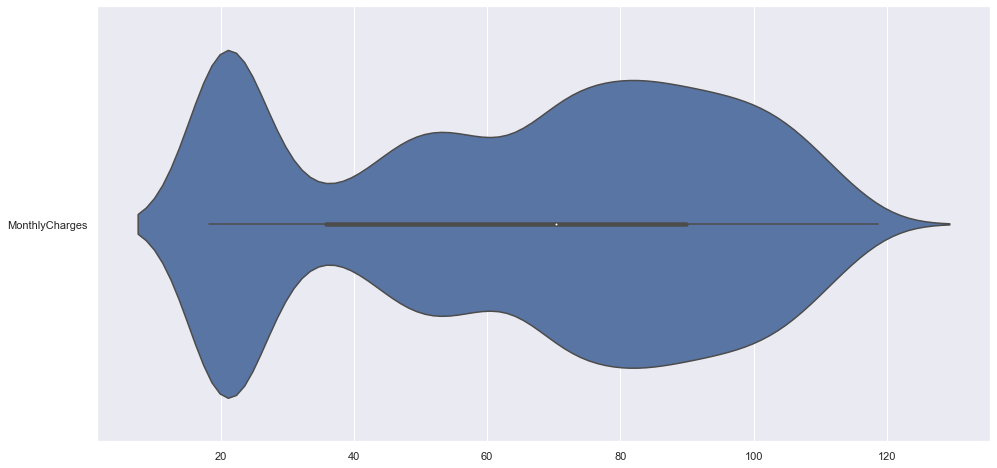

In [33]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = ChurnMonthlyCharges, orient = "h")

In [29]:
train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,0.499733,0.162311,0.479111,0.298667,32.291200,0.903467,0.416889,0.875556,0.286044,0.340622,0.341156,0.288356,0.380800,0.388622,0.688000,0.596267,1.579911,64.750240,0.265956
std,0.500044,0.368769,0.499608,0.457714,24.536496,0.295348,0.493088,0.736289,0.451951,0.473961,0.474140,0.453038,0.485627,0.487480,0.833961,0.490689,1.067455,30.046332,0.441880
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,28.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.300000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.650000,1.000000


# Based on Tenure VS Churn, we see that cat 1 churn the most. Less than 10 years tenure, customers are not loyal - about 50% churn. A reduction of 5% churn if they move to cat 2 and 20% if they move to cat 3. At cat 8 (highest in our dataset) there is almost 0% churn rate.

# If there are people not subscribed to phone what are they subscribing for?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
fig_churn_phone_service = sns.countplot(x="PhoneService",hue="Churn",data=train)
fig_churn_phone_service.set_title("Churn rate based on PhoneService")
plt.show()

# Majority of subscribers are with phone service. With phone service, the churn rate is about 36%. 

In [ ]:
# PaperlessBilling vs Churn
f, ax = plt.subplots(figsize=(12, 6))

fig_churn_phone_service = sns.countplot(x="PaperlessBilling",hue="Churn",data=train)
fig_churn_phone_service.set_title("Does Having a PaperlessBilling affect Churn rate?")
plt.show()

# If no phoneservice is the contract period shorter?

# Surprisingly, even with no phone service, the churn rate is about 33% churn rate. 